In [1]:
%matplotlib notebook

In [2]:
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import datetime as dt

In [3]:
housing_df = pd.read_csv("Resources/DC_Properties.csv")

/anaconda3/envs/PythonData/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3020: DtypeWarning: Columns (18,19,20,21,22,23,24,33,34,35,37,43,45) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [4]:
housing_df2 = housing_df.drop(["Unnamed: 0", "BLDG_NUM", "NATIONALGRID", "X", "Y"], axis=1)
housing_df2.head()

,BATHRM,HF_BATHRM,HEAT,AC,NUM_UNITS,ROOMS,BEDRM,AYB,YR_RMDL,EYB,...,ZIPCODE,LATITUDE,LONGITUDE,ASSESSMENT_NBHD,ASSESSMENT_SUBNBHD,CENSUS_TRACT,CENSUS_BLOCK,WARD,SQUARE,QUADRANT
0,4,0,Warm Cool,Y,2.0,8,4,1910.0,1988.0,1972,...,20009.0,38.914680,-77.040832,Old City 2,040 D Old City 2,4201.0,004201 2006,Ward 2,152,NW
1,3,1,Warm Cool,Y,2.0,11,5,1898.0,2007.0,1972,...,20009.0,38.914683,-77.040764,Old City 2,040 D Old City 2,4201.0,004201 2006,Ward 2,152,NW
2,3,1,Hot Water Rad,Y,2.0,9,5,1910.0,2009.0,1984,...,20009.0,38.914684,-77.040678,Old City 2,040 D Old City 2,4201.0,004201 2006,Ward 2,152,NW
3,3,1,Hot Water Rad,Y,2.0,8,5,1900.0,2003.0,1984,...,20009.0,38.914683,-77.040629,Old City 2,040 D Old City 2,4201.0,004201 2006,Ward 2,152,NW
4,2,1,Warm Cool,Y,1.0,11,3,1913.0,2012.0,1985,...,20009.0,38.914383,-77.039361,Old City 2,040 D Old City 2,4201.0,004201 2006,Ward 2,152,NW


In [5]:
housing_df2['YEAR'] = pd.DatetimeIndex(housing_df2['SALEDATE']).year
housing_df2['MONTH'] = pd.DatetimeIndex(housing_df2['SALEDATE']).month
housing_df2.head()

,BATHRM,HF_BATHRM,HEAT,AC,NUM_UNITS,ROOMS,BEDRM,AYB,YR_RMDL,EYB,...,LONGITUDE,ASSESSMENT_NBHD,ASSESSMENT_SUBNBHD,CENSUS_TRACT,CENSUS_BLOCK,WARD,SQUARE,QUADRANT,YEAR,MONTH
0,4,0,Warm Cool,Y,2.0,8,4,1910.0,1988.0,1972,...,-77.040832,Old City 2,040 D Old City 2,4201.0,004201 2006,Ward 2,152,NW,2003.0,11.0
1,3,1,Warm Cool,Y,2.0,11,5,1898.0,2007.0,1972,...,-77.040764,Old City 2,040 D Old City 2,4201.0,004201 2006,Ward 2,152,NW,2000.0,8.0
2,3,1,Hot Water Rad,Y,2.0,9,5,1910.0,2009.0,1984,...,-77.040678,Old City 2,040 D Old City 2,4201.0,004201 2006,Ward 2,152,NW,2016.0,6.0
3,3,1,Hot Water Rad,Y,2.0,8,5,1900.0,2003.0,1984,...,-77.040629,Old City 2,040 D Old City 2,4201.0,004201 2006,Ward 2,152,NW,2006.0,7.0
4,2,1,Warm Cool,Y,1.0,11,3,1913.0,2012.0,1985,...,-77.039361,Old City 2,040 D Old City 2,4201.0,004201 2006,Ward 2,152,NW,NaN,NaN


In [6]:
housing_df2 = housing_df2[housing_df2.PRICE.notnull()]
residential_df = housing_df2.loc[housing_df2["SOURCE"] == "Residential"]
residential_df.count().head()

BATHRM       57900
HF_BATHRM    57900
HEAT         57900
AC           57900
NUM_UNITS    57900
dtype: int64

In [7]:
housing_df3 = residential_df[['YEAR','YR_RMDL','WARD']]
housing_df3.head()

,YEAR,YR_RMDL,WARD
0,2003.0,1988.0,Ward 2
2,2016.0,2009.0,Ward 2
3,2006.0,2003.0,Ward 2
5,2010.0,NaN,Ward 2
7,2011.0,2011.0,Ward 2


In [10]:
housing_df3 = housing_df3[housing_df3.YR_RMDL.notnull()]
housing_df3 = housing_df3[housing_df3.WARD.notnull()]
housing_df3 = housing_df3[~(housing_df3['YR_RMDL'] < 1992.0)] 
housing_df3 = housing_df3[~(housing_df3['YR_RMDL'] > 2017.0)]
housing_df3.head()

,YEAR,YR_RMDL,WARD
2,2016.0,2009.0,Ward 2
3,2006.0,2003.0,Ward 2
7,2011.0,2011.0,Ward 2
8,2018.0,2008.0,Ward 2
14,2011.0,2000.0,Ward 2


In [11]:
remodel_Ward1 = housing_df3[housing_df3['WARD'] == 'Ward 1']
remodel_Ward1_df = remodel_Ward1.groupby('YR_RMDL')['WARD'].count()
remodel_Ward1_df_pd = pd.DataFrame(data = remodel_Ward1_df)
remodel_Ward1_df_pd = remodel_Ward1_df_pd.rename(columns={'WARD': 'Ward 1'})

remodel_Ward2 = housing_df3[housing_df3['WARD'] == 'Ward 2']
remodel_Ward2_df = remodel_Ward2.groupby('YR_RMDL')['WARD'].count()
remodel_Ward2_df_pd = pd.DataFrame(data = remodel_Ward2_df)
remodel_Ward2_df_pd = remodel_Ward2_df_pd.rename(columns={'WARD': 'Ward 2'})

remodel_Ward3 = housing_df3[housing_df3['WARD'] == 'Ward 3']
remodel_Ward3_df = remodel_Ward3.groupby('YR_RMDL')['WARD'].count()
remodel_Ward3_df_pd = pd.DataFrame(data = remodel_Ward3_df)
remodel_Ward3_df_pd = remodel_Ward3_df_pd.rename(columns={'WARD': 'Ward 3'})

remodel_Ward4 = housing_df3[housing_df3['WARD'] == 'Ward 4']
remodel_Ward4_df = remodel_Ward4.groupby('YR_RMDL')['WARD'].count()
remodel_Ward4_df_pd = pd.DataFrame(data = remodel_Ward4_df)
remodel_Ward4_df_pd = remodel_Ward4_df_pd.rename(columns={'WARD': 'Ward 4'})

remodel_merge_ward = remodel_Ward1_df_pd.join(remodel_Ward2_df_pd,how='inner')
remodel_merge_ward_df = remodel_merge_ward.join(remodel_Ward3_df_pd,how='inner')
remodel_merge_ward_df2 = remodel_merge_ward_df.join(remodel_Ward4_df_pd,how='inner')

remodel_merge_ward_df2


,Ward 1,Ward 2,Ward 3,Ward 4
YR_RMDL,,,,
1992.0,34,27,73,75
1993.0,5,6,31,16
1994.0,5,15,44,22
1995.0,15,30,68,30
1996.0,5,19,56,27
1997.0,5,10,38,10
1998.0,10,26,70,25
1999.0,22,32,62,26
2000.0,71,122,155,76


<IPython.core.display.Javascript object>


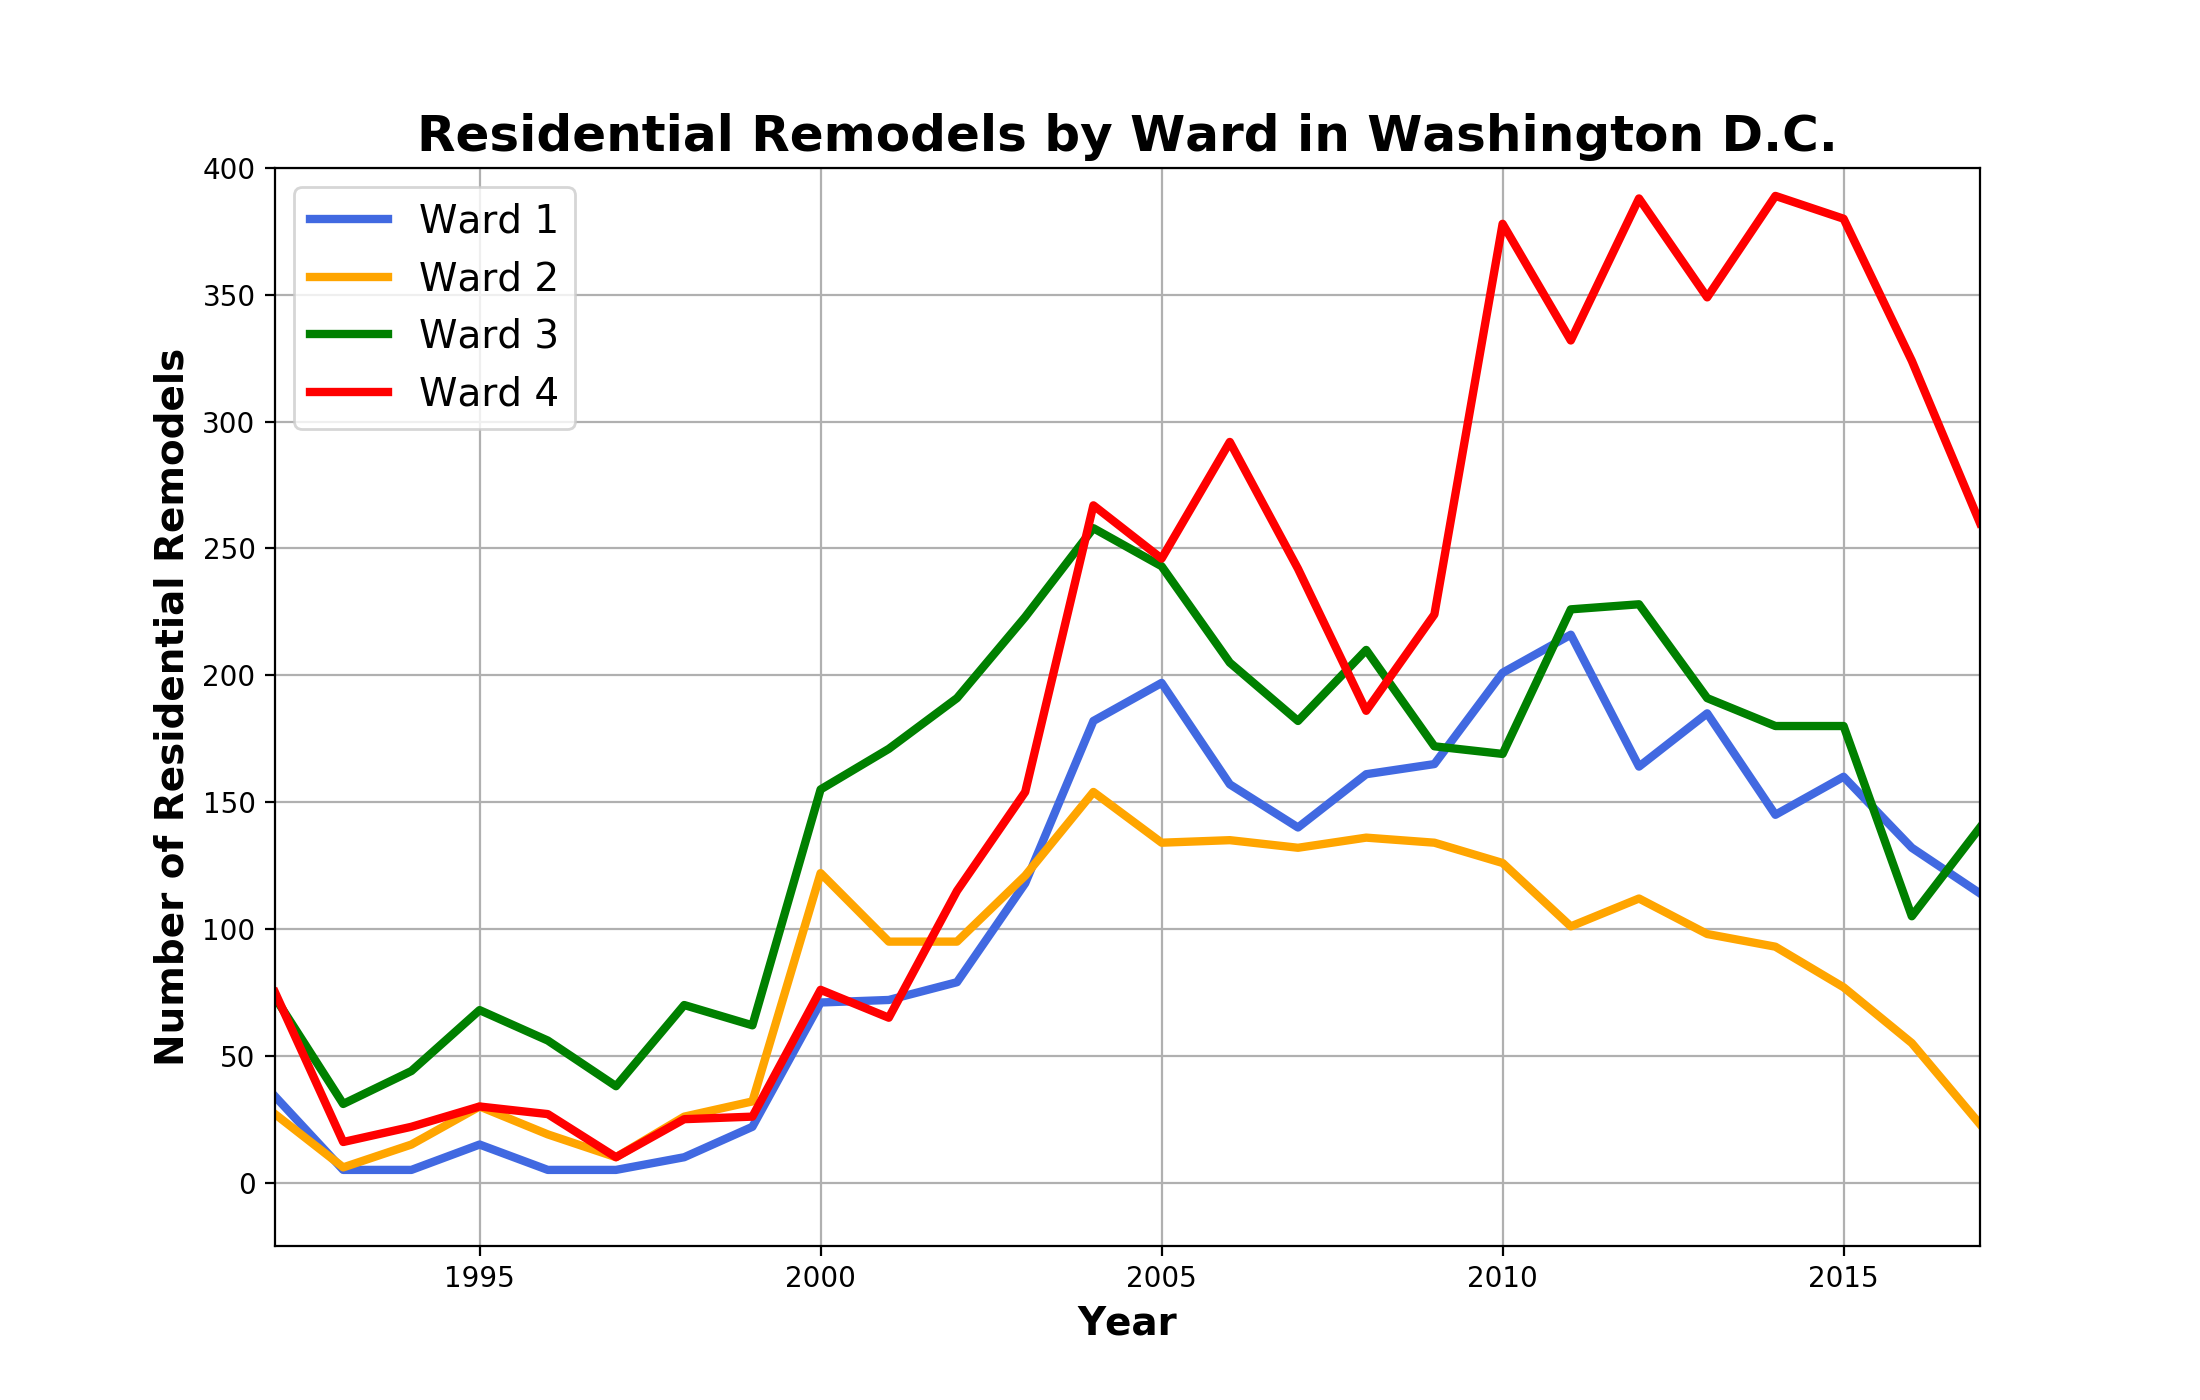

In [15]:
colors = ["royalblue", "orange", "green", "red"]
remodel_merge_ward_df2.plot(xlim=(1992.0,2017.0), figsize=(11,7), colors = colors, linewidth=3)
plt.title("Residential Remodels by Ward in Washington D.C.", fontsize=18, fontweight='bold')
plt.ylabel("Number of Residential Remodels", fontsize=14, fontweight='bold')
plt.xlabel("Year", fontsize=14, fontweight='bold')
plt.grid()
plt.ylim(-25,400)
plt.legend(fontsize=14)
plt.savefig("NewImages/Remodels_in_DC_ward.png")